# Importing all the Libraries

### Core Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### NLP Libraries

In [53]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dinesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dinesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dinesh\AppData\Roaming\nltk_data...


True

### Others

In [10]:
import warnings
warnings.filterwarnings('ignore')

# Data Input

In [94]:
input_labelled = pd.read_csv('C:/Users/Dinesh/Git_Hub/HostelFix-AI/data/data_input.csv')
input0 = pd.DataFrame(input_labelled)
df0 = input0
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   complaint      579 non-null    object
 1   priority       579 non-null    int64 
 2   parts          579 non-null    object
 3   repair_person  579 non-null    object
dtypes: int64(1), object(3)
memory usage: 18.2+ KB


In [95]:
df0.head(10)

,complaint,priority,parts,repair_person
0,Mirror is broken in the second floor east side...,1,Yes,Others
1,Light is not working,4,Yes,"Yes, An electrician"
2,Leaky pipes under sinks on floor 5,3,Yes,"Yes, A plumber"
3,wall hook for clothes needs to be fixed,2,No,"Yes, A carpenter"
4,"WiFi drops out frequently, disrupting online work",3,No,"Yes, A wifi Technician"
5,"AC is not working in common room 2, GarnetB",3,No,"Yes, An electrician"
6,Wifi occasionally stops working completely in ...,3,No,"Yes, A wifi Technician"
7,Water cooler is not working in 1st floor,3,No,"Yes, An electrician"
8,The table in the common room is wobbly and ne...,2,Yes,"Yes, A carpenter"
9,The clothes hanger hook in room number 409 is ...,2,Yes,"Yes, A carpenter"


In [96]:
input_raw_chat = pd.read_csv('C:/Users/Dinesh/Git_Hub/HostelFix-AI/data/raw_text_input.csv')
input1 = pd.DataFrame(input_raw_chat)
df = input1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   complaint  661 non-null    object
dtypes: object(1)
memory usage: 5.3+ KB


In [97]:
df.head(10)

,complaint
0,"29/08/24, 5:37 pm - +91 85907 34302: @91962968..."
1,"29/08/24, 5:47 pm - +91 89544 46533: @91962968..."
2,"29/08/24, 6:14 pm - +91 94951 11941: They alre..."
3,"29/08/24, 6:17 pm - +91 70911 94066: @91962968..."
4,"29/08/24, 8:40 pm - +91 62644 98745: Please do..."
5,"30/08/24, 9:30 pm - +91 72501 36858: All are f..."
6,"31/08/24, 9:36 am - +91 97893 20825: @91962968..."
7,"31/08/24, 10:03 am - +91 70911 94066: @9196296..."
8,"31/08/24, 10:14 am - +91 86373 37272: @9196296..."
9,"31/08/24, 11:01 am - Thumma Dinesh: I think we..."


# Regular Expressions
### Sample Date & time formats are : 12/03/2025, 9:45 am -
### Sample Phone numbers formats are : +91 98765 43210 or 9876543210
### And for the Sender names (optional) : Anything before the colon is treated as the sender name

In [98]:
# pattern for date & time formats
pattern_date_time = re.compile(
    r"^(?:\d{1,2}[/-]\d{1,2}[/-]\d{2,4},?\s*\d{1,2}:\d{2}(?:\s*[APMapm]{2})?\s*-\s*)?"
)

In [99]:
# Applied reg exp to remove date & timestamp from messages
df["complaint"] = df["complaint"].apply(lambda x: re.sub(pattern_date_time, "", str(x)).strip())
df.head(10)

,complaint
0,+91 85907 34302: @919629686866 no water in bat...
1,+91 89544 46533: @919629686866 no water in 3rd...
2,+91 94951 11941: They already notified about s...
3,+91 70911 94066: @919629686866 no water in ba...
4,+91 62644 98745: Please do something about the...
5,+91 72501 36858: All are facing same issue.
6,"+91 97893 20825: @919629686866 sir, Normal wat..."
7,+91 70911 94066: @919629686866 sir foot light ...
8,+91 86373 37272: @919629686866 sir will the pe...
9,Thumma Dinesh: I think we need to wait till to...


In [100]:
# pattern for phone number or name followed by colon
pattern_phone_number = re.compile(
    r"(?:\+?\d{1,4}[\s-]?\d{5}[\s-]?\d{5}|[^:]+)?:\s*"
)

In [101]:
# Applied reg exp to remove phone numbers from messages
df["complaint"] = df["complaint"].apply(lambda x: re.sub(pattern_phone_number, "", str(x)).strip())
df.head(10)

,complaint
0,@919629686866 no water in bathroom 1st floor
1,@919629686866 no water in 3rd floor
2,They already notified about some problem with ...
3,@919629686866 no water in bathroom on 3rd floor
4,Please do something about the water problem
5,All are facing same issue.
6,"@919629686866 sir, Normal water not coming for..."
7,@919629686866 sir foot light is not working in...
8,@919629686866 sir will the people who don’t wa...
9,"30 pm, may be after deadline they will generat..."


In [102]:
df["complaint"] = df["complaint"].apply(lambda x: re.sub(r"@\d+", "", x).strip())
df.head(10)

,complaint
0,no water in bathroom 1st floor
1,no water in 3rd floor
2,They already notified about some problem with ...
3,no water in bathroom on 3rd floor
4,Please do something about the water problem
5,All are facing same issue.
6,"sir, Normal water not coming for 2 days in 1st..."
7,sir foot light is not working in room no-249. ...
8,sir will the people who don’t want to change t...
9,"30 pm, may be after deadline they will generat..."


In [103]:
df = df0
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   complaint      579 non-null    object
 1   priority       579 non-null    int64 
 2   parts          579 non-null    object
 3   repair_person  579 non-null    object
dtypes: int64(1), object(3)
memory usage: 18.2+ KB


In [104]:
print(df.columns)
df.head(15)

Index(['complaint', 'priority', 'parts', 'repair_person'], dtype='object')


,complaint,priority,parts,repair_person
0,Mirror is broken in the second floor east side...,1,Yes,Others
1,Light is not working,4,Yes,"Yes, An electrician"
2,Leaky pipes under sinks on floor 5,3,Yes,"Yes, A plumber"
3,wall hook for clothes needs to be fixed,2,No,"Yes, A carpenter"
4,"WiFi drops out frequently, disrupting online work",3,No,"Yes, A wifi Technician"
5,"AC is not working in common room 2, GarnetB",3,No,"Yes, An electrician"
6,Wifi occasionally stops working completely in ...,3,No,"Yes, A wifi Technician"
7,Water cooler is not working in 1st floor,3,No,"Yes, An electrician"
8,The table in the common room is wobbly and ne...,2,Yes,"Yes, A carpenter"
9,The clothes hanger hook in room number 409 is ...,2,Yes,"Yes, A carpenter"


## Data Distribution

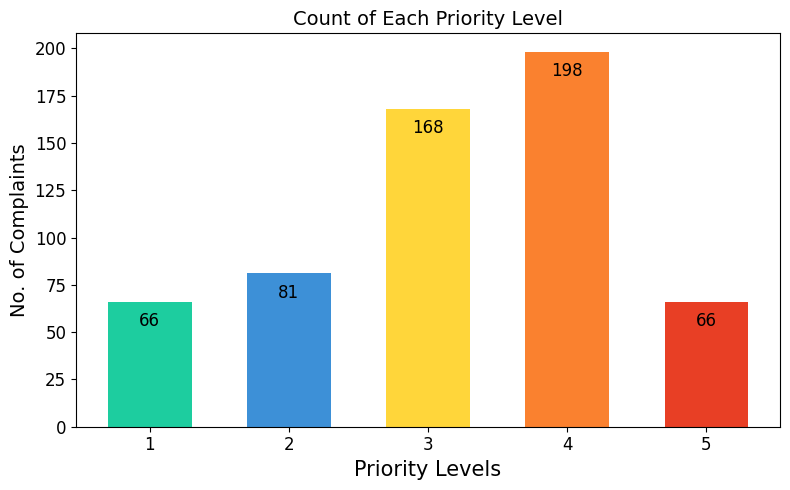

In [110]:
priority_counts = df['priority'].value_counts().sort_index()

colors = ['#1DCD9F','#3D90D7','#FFD63A','#FA812F','#E83F25']

plt.figure(figsize=(8, 5))
bars = plt.bar(priority_counts.index, priority_counts.values, color=colors, width=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval - 15, int(yval), ha='center', va='bottom', fontsize=12)

plt.xlabel('Priority Levels', fontsize=15)
plt.ylabel('No. of Complaints', fontsize=14)
plt.title('Count of Each Priority Level', fontsize=14)
plt.xticks(priority_counts.index, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

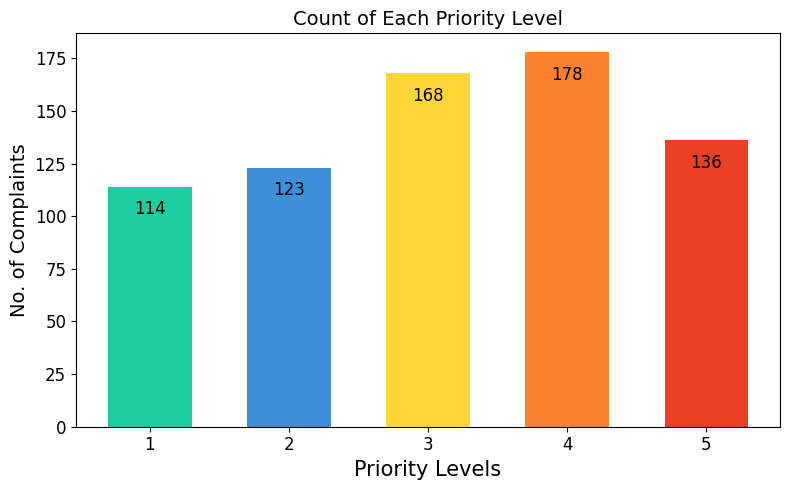

In [109]:
labelled = pd.read_csv('C:/Users/Dinesh/Git_Hub/HostelFix-AI/data/data_input.csv')
priority_counts = labelled['priority'].value_counts().sort_index()

colors = ['#1DCD9F','#3D90D7','#FFD63A','#FA812F','#E83F25']

plt.figure(figsize=(8, 5))
bars = plt.bar(priority_counts.index, priority_counts.values, color=colors, width=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval - 15, int(yval), ha='center', va='bottom', fontsize=12)

plt.xlabel('Priority Levels', fontsize=15)
plt.ylabel('No. of Complaints', fontsize=14)
plt.title('Count of Each Priority Level', fontsize=14)
plt.xticks(priority_counts.index, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()